<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.260687,43.534300,86.198841,0.039176,180.033003,179.993492,0.039512
1,0.0,1.0,88.552522,91.323850,57.534487,0.006532,247.417390,247.408032,0.009358
2,0.0,2.0,44.876406,42.842625,90.353718,-0.029975,188.042775,188.071071,-0.028296
3,0.0,3.0,89.230526,68.793667,74.504795,-0.024422,242.504565,242.523948,-0.019383
4,0.0,4.0,64.988512,64.278988,66.324720,-0.002058,205.590162,205.591910,-0.001748
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,59.989081,48.525896,86.998446,0.002229,205.515652,205.521785,-0.006133
59996,999.0,56.0,70.698031,42.051896,86.511191,-0.040327,209.220790,209.272401,-0.051611
59997,999.0,57.0,40.500473,69.673048,41.495914,0.011698,161.681133,161.668770,0.012363
59998,999.0,58.0,91.338599,53.635440,33.198602,0.010151,188.182791,188.183076,-0.000285


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.260687,43.534300,86.198841,0.039176,180.033003,179.993492,0.039512
1,0.0,1.0,88.552522,91.323850,57.534487,0.006532,247.417390,247.408032,0.009358
2,0.0,2.0,44.876406,42.842625,90.353718,-0.029975,188.042775,188.071071,-0.028296
3,0.0,3.0,89.230526,68.793667,74.504795,-0.024422,242.504565,242.523948,-0.019383
4,0.0,4.0,64.988512,64.278988,66.324720,-0.002058,205.590162,205.591910,-0.001748
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,59.989081,48.525896,86.998446,0.002229,205.515652,205.521785,-0.006133
59996,999.0,56.0,70.698031,42.051896,86.511191,-0.040327,209.220790,209.272401,-0.051611
59997,999.0,57.0,40.500473,69.673048,41.495914,0.011698,161.681133,161.668770,0.012363
59998,999.0,58.0,91.338599,53.635440,33.198602,0.010151,188.182791,188.183076,-0.000285


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    40.260687  43.534300  86.198841  ...  180.033003  179.993492  0.039512
      1.0    88.552522  91.323850  57.534487  ...  247.417390  247.408032  0.009358
      2.0    44.876406  42.842625  90.353718  ...  188.042775  188.071071 -0.028296
      3.0    89.230526  68.793667  74.504795  ...  242.504565  242.523948 -0.019383
      4.0    64.988512  64.278988  66.324720  ...  205.590162  205.591910 -0.001748
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   59.989081  48.525896  86.998446  ...  205.515652  205.521785 -0.006133
      56.0   70.698031  42.051896  86.511191  ...  209.220790  209.272401 -0.051611
      57.0   40.500473  69.673048  41.495914  ...  161.681133  161.668770  0.012363
      58.0   91.338599  53.635440  33.198602  ...  188.182791  188.183076 -0.000285
      59.0   22.341381  70.114102  21.802405  ...  124.257596  124.253122  0.004474

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    40.260687  43.534300  86.198841  ...  180.033003  179.993492  0.039512
      1.0    88.552522  91.323850  57.534487  ...  247.417390  247.408032  0.009358
      2.0    44.876406  42.842625  90.353718  ...  188.042775  188.071071 -0.028296
      3.0    89.230526  68.793667  74.504795  ...  242.504565  242.523948 -0.019383
      4.0    64.988512  64.278988  66.324720  ...  205.590162  205.591910 -0.001748
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   59.989081  48.525896  86.998446  ...  205.515652  205.521785 -0.006133
      56.0   70.698031  42.051896  86.511191  ...  209.220790  209.272401 -0.051611
      57.0   40.500473  69.673048  41.495914  ...  161.681133  161.668770  0.012363
      58.0   91.338599  53.635440  33.198602  ...  188.182791  188.183076 -0.000285
      59.0   22.341381  70.114102  21.802405  ...  124.257596  124.253122  0.004474

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.260687,43.534300,86.198841,0.039176,180.033003,179.993492,0.039512
1,0.0,1.0,88.552522,91.323850,57.534487,0.006532,247.417390,247.408032,0.009358
2,0.0,2.0,44.876406,42.842625,90.353718,-0.029975,188.042775,188.071071,-0.028296
3,0.0,3.0,89.230526,68.793667,74.504795,-0.024422,242.504565,242.523948,-0.019383
4,0.0,4.0,64.988512,64.278988,66.324720,-0.002058,205.590162,205.591910,-0.001748
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,59.989081,48.525896,86.998446,0.002229,205.515652,205.521785,-0.006133
59996,999.0,56.0,70.698031,42.051896,86.511191,-0.040327,209.220790,209.272401,-0.051611
59997,999.0,57.0,40.500473,69.673048,41.495914,0.011698,161.681133,161.668770,0.012363
59998,999.0,58.0,91.338599,53.635440,33.198602,0.010151,188.182791,188.183076,-0.000285


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    40.260687  43.534300  86.198841  ...  180.033003  179.993492  0.039512
      1.0    88.552522  91.323850  57.534487  ...  247.417390  247.408032  0.009358
      2.0    44.876406  42.842625  90.353718  ...  188.042775  188.071071 -0.028296
      3.0    89.230526  68.793667  74.504795  ...  242.504565  242.523948 -0.019383
      4.0    64.988512  64.278988  66.324720  ...  205.590162  205.591910 -0.001748
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   59.989081  48.525896  86.998446  ...  205.515652  205.521785 -0.006133
      56.0   70.698031  42.051896  86.511191  ...  209.220790  209.272401 -0.051611
      57.0   40.500473  69.673048  41.495914  ...  161.681133  161.668770  0.012363
      58.0   91.338599  53.635440  33.198602  ...  188.182791  188.183076 -0.000285
      59.0   22.341381  70.114102  21.802405  ...  124.257596  124.253122  0.004474

[60000 rows x 7 columns]

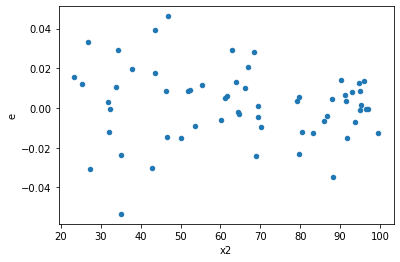

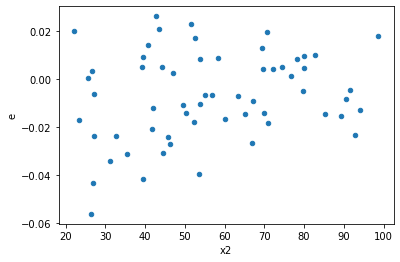

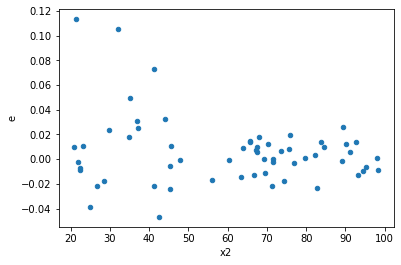

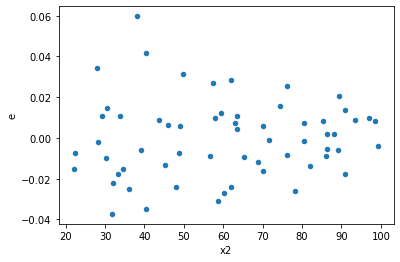

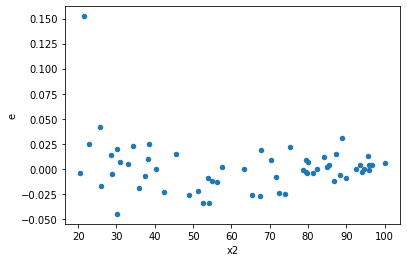

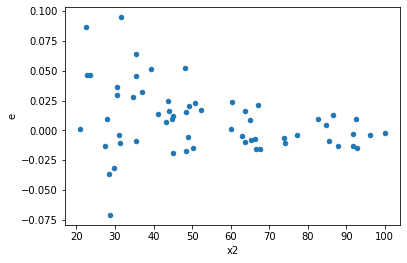

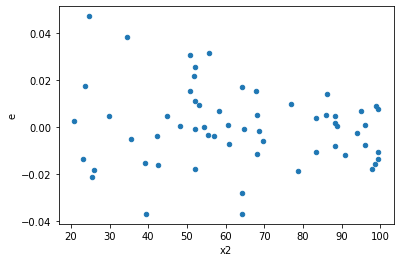

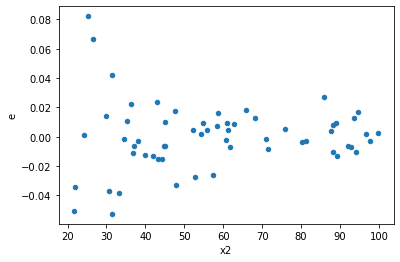

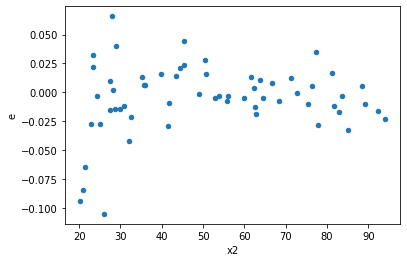

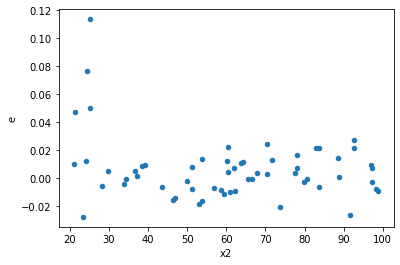

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.011821767198866606,0.0026193025653844875,0.0005629412951841241,0.0001247286935897375,0.22156607564016398,0.0010742067868580345,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,0.00900516026773152,0.0035803747400069644,0.0004288171556062628,0.00017049403523842688,0.39759145129672335,0.04003241784196797,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,0.027028091992861176,0.003315700641941365,0.001287051999660056,0.0001578905067591126,0.12267608985558907,1.0706880462859705e-05,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,0.012502699758071733,0.003532810476958985,0.000595366655146273,0.00016822907033138022,0.2825638098426066,0.005517966492078585,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,0.02283463395000943,0.0017132936443986096,0.0010873635214290204,8.158541163802903e-05,0.07503048431384651,1.4006732306131186e-07,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,0.026812545694036134,0.0027315982919473452,0.0012767878901921968,0.00013007610914034977,0.10187761815376337,2.172762830406084e-06,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,0.00851911771867927,0.0017994090491444226,0.0004056722723180605,8.568614519735345e-05,0.21122011792359494,0.0007633794607065593,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,0.02437718584257571,0.0023564323257489707,0.0011608183734559863,0.00011221106313090336,0.09666547816333126,1.3700841942560228e-06,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,0.03479703490427089,0.004862113107563748,0.0016570016621081378,0.00023152919559827373,0.139727799248981,3.153400771489596e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    903
Reject001=1 : Homoscedasticity       97
Name: Result_test, dtype: int64